In [1]:
from trajectory_analysis import *

c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\configuration_utils.py:335: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [2]:
embed_path = "saved_embeds/conversation_embeddings3.pkl"
speakers = ["dean", "cindy"]
audio_folder = "blue valentine audio"

if os.path.exists(embed_path):
    embeddings_dict = load_embeddings(embed_path)
    print(f"Loaded embeddings from {embed_path}")
else:
    print("Creating new embeddings...")
    embeddings_dict = embed_audio_scene(audio_folder, speakers)
    save_embeddings(embeddings_dict, embed_path)
    print(f"Saved new embeddings to {embed_path}")


Loaded embeddings from saved_embeds/conversation_embeddings3.pkl


In [3]:
emotional_dict = run_emotional_layers(embeddings_dict, speakers[0], speakers[1])

In [4]:
annotations = load_annotations_txt("annotations/blueval_ant.txt", speakers)
for speaker, utt_dict in annotations.items():
    print(f"Speaker: {speaker}")
    for utt_idx, text in utt_dict.items():
        print(f"  Utterance {utt_idx + 1}: {text}")
    print("-" * 30)

Speaker: dean
  Utterance 2: playful
  Utterance 4: annoyed
  Utterance 5: seems annoyed at cindy now
  Utterance 7: interrogative
  Utterance 8: upset
  Utterance 10: annoyed
  Utterance 11: condescending almost
  Utterance 16: still upset
------------------------------
Speaker: cindy
  Utterance 2: also chill
  Utterance 5: defensive
  Utterance 7: flustered
  Utterance 9: very flustered
  Utterance 12: still flustered
  Utterance 15: retreating
  Utterance 16: fully backed down
------------------------------


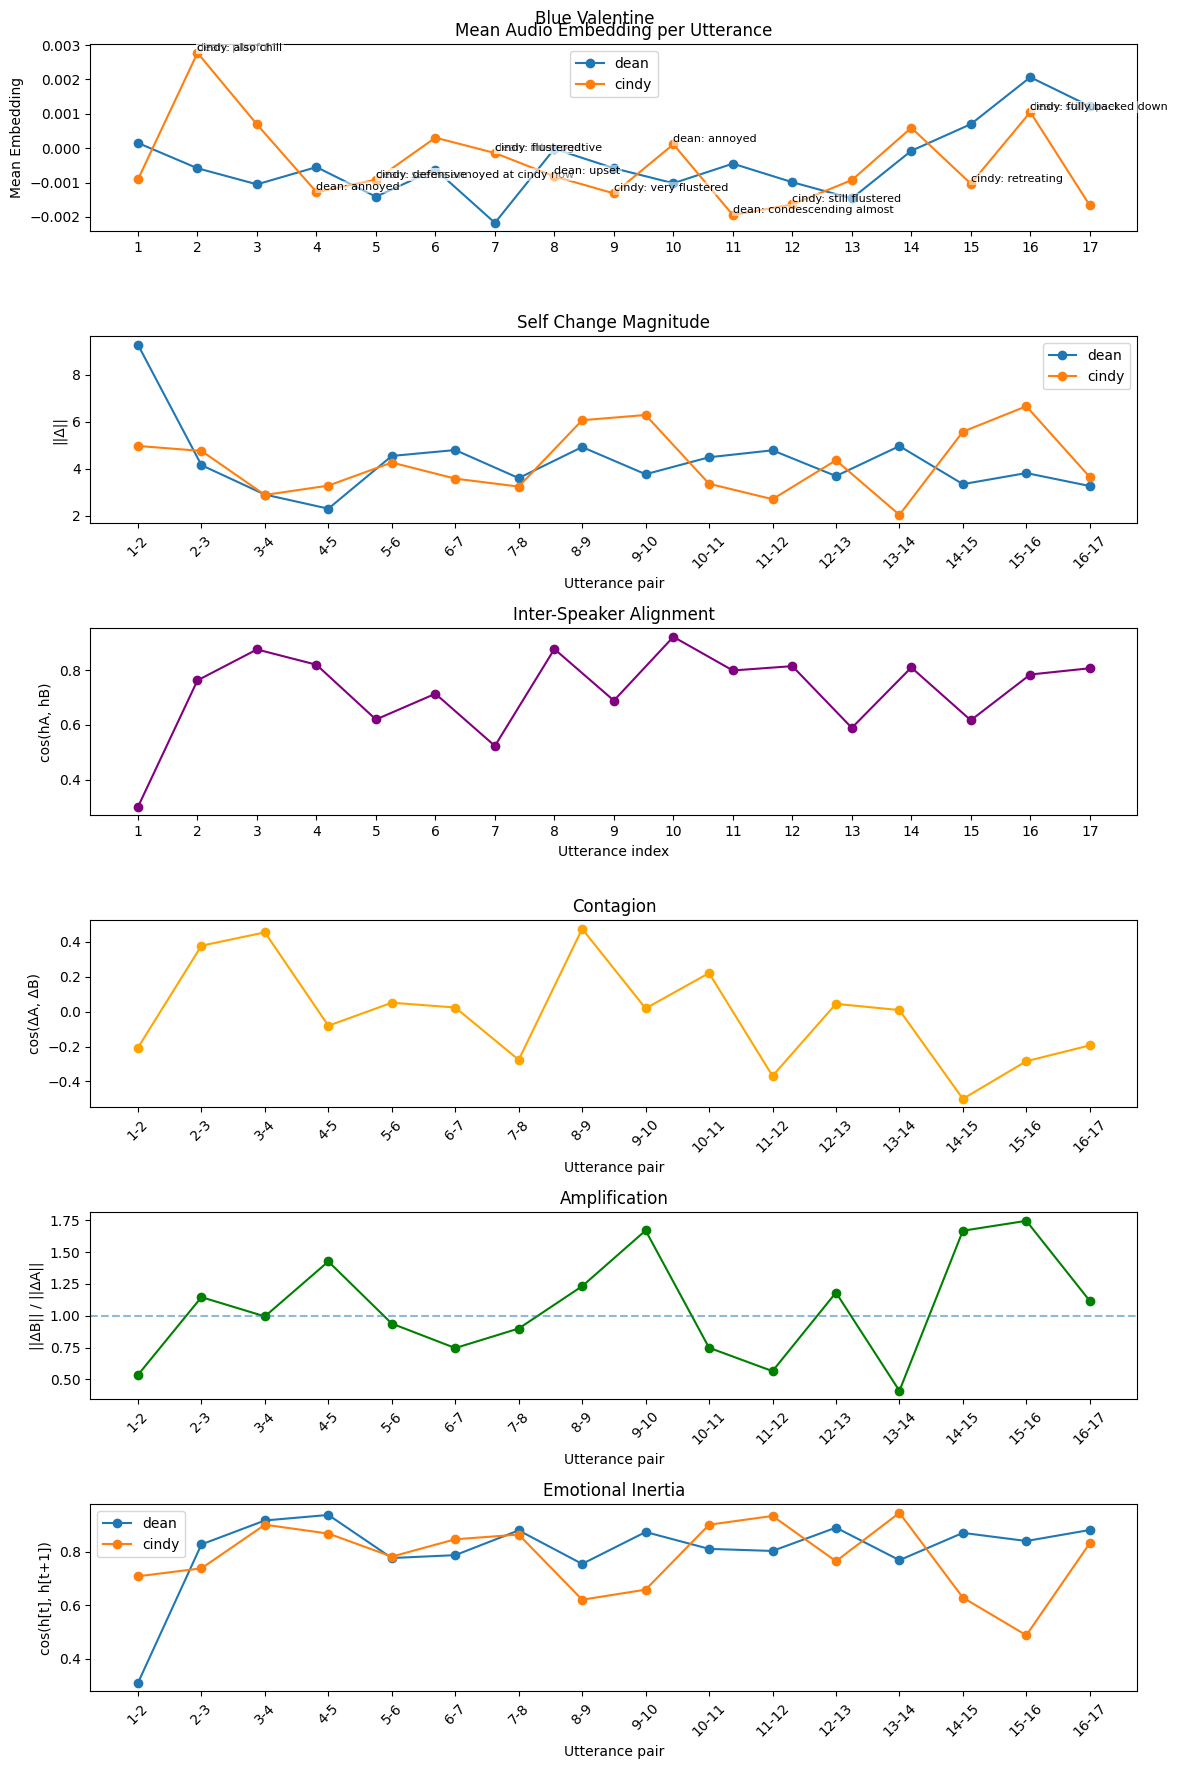

In [5]:
plot_emotional_layers(emotional_dict, speakers, scene_name="Blue Valentine", annotations=annotations, embedding_dict=embeddings_dict)

In [6]:
generate_scene_summary_with_trends(emotional_dict, speakers)

dean: experiences noticeable emotional shifts.
Reasoning:
max_delta=9.27 > 4.269819171726704
Per-utterance trends:
  volatility: utterances 1, 5, 6, 8, 13
  reactive: utterances 8
  accommodating: utterances 2, 3, 8, 10, 12
  rigid: utterances 7, 11
  notable_shift: utterances 1, 5, 6, 8, 10, 11, 13
--------------------------------------------------
cindy: experiences noticeable emotional shifts.
Reasoning:
max_delta=6.66 > 4.269819171726704
Per-utterance trends:
  volatility: utterances 1, 2, 8, 9, 12, 14, 15
  reactive: utterances 2, 8, 9, 12, 14, 15
  accommodating: utterances 2, 3, 8, 10, 12
  rigid: utterances 7, 11
  notable_shift: utterances 1, 2, 8, 9, 12, 14, 15
--------------------------------------------------


{'dean': {'summary': 'dean: experiences noticeable emotional shifts.',
  'reasoning': 'max_delta=9.27 > 4.269819171726704',
  'trends': {'volatility': [0, 4, 5, 7, 12],
   'reactive': [7],
   'accommodating': [1, 2, 7, 9, 11],
   'rigid': [6, 10],
   'notable_shift': [0, 4, 5, 7, 9, 10, 12]}},
 'cindy': {'summary': 'cindy: experiences noticeable emotional shifts.',
  'reasoning': 'max_delta=6.66 > 4.269819171726704',
  'trends': {'volatility': [0, 1, 7, 8, 11, 13, 14],
   'reactive': [1, 7, 8, 11, 13, 14],
   'accommodating': [1, 2, 7, 9, 11],
   'rigid': [6, 10],
   'notable_shift': [0, 1, 7, 8, 11, 13, 14]}}}